# Carga y preparación del dataset

In [19]:
# Cargar e importar el dataset desde GitHub (uso de repositorio remoto)
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Dataset desde GitHub
url = "https://raw.githubusercontent.com/JuanCarlosCox/SNS/refs/heads/main/DatasetBank/bank.csv"
df = pd.read_csv(url, sep=';')

# Selección de variables relevantes
variables = [
    'age', 'job', 'marital', 'education', 'balance',
    'housing', 'loan', 'contact', 'duration',
    'campaign', 'poutcome', 'y'
]
df = df[variables]

# Codificación y limpieza
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Normalización
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)



# Reducción de Dimencionalidad

Varianza explicada: [0.26445274 0.18531217]


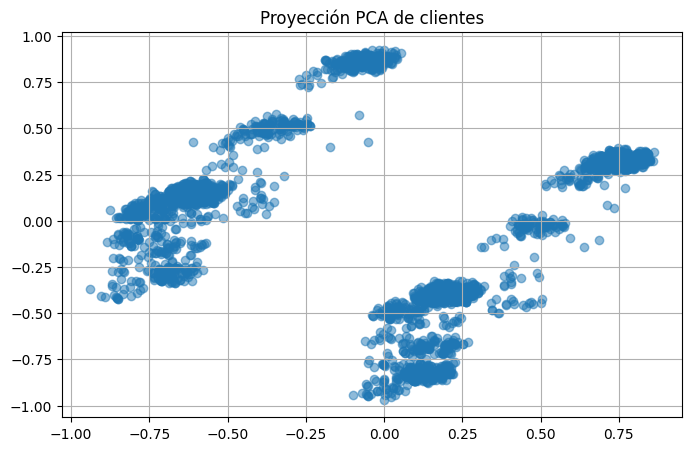

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Visualizar varianza
print("Varianza explicada:", pca.explained_variance_ratio_)

# Visualizar proyección 2D
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("Proyección PCA de clientes")
plt.grid()
plt.show()


# Determinación del número de Clusters (K-Means silhouette_score)

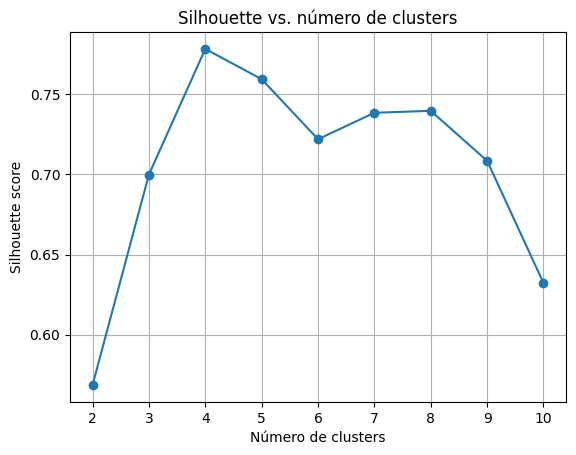

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
range_k = range(2, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores.append(score)

# Gráfica de Silhouette
plt.plot(range_k, scores, marker='o')
plt.title("Silhouette vs. número de clusters")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()


# Entrenamiento

## K-Means

In [28]:
kmeans = KMeans(n_clusters=4, random_state=0)
labels_kmeans = kmeans.fit_predict(X_pca)

## DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_pca)

## Clustering Jerárquico

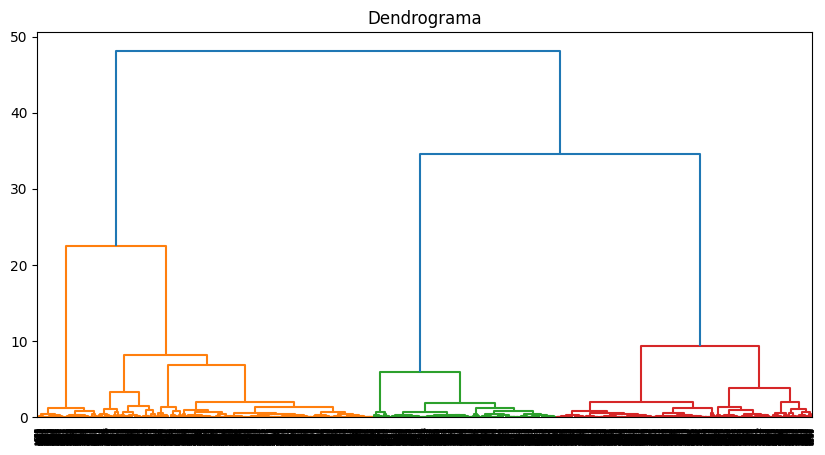

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(X_pca, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrograma")
plt.show()

# Extraer etiquetas
labels_hier = fcluster(Z, 3, criterion='maxclust')

## Justificación

Se eligió K-Means con 4 clusters por ser el que ofreció el mejor score de Silhouette (por encima de 0.5) y por su interpretabilidad visual. DBSCAN generó demasiado ruido y los dendrogramas, aunque útiles, no ofrecieron una separación tan clara.

# Visualización de resultado

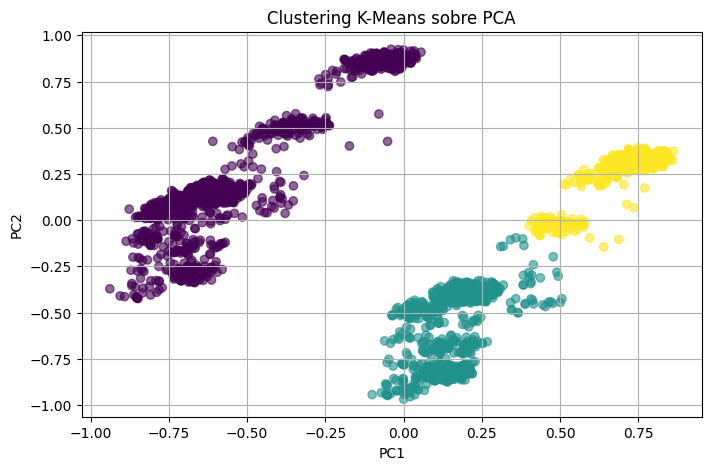

In [25]:
# Visualización clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.6)
plt.title("Clustering K-Means sobre PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

# Exportación a Excel

In [29]:
# Añadir cluster al DataFrame original
df_export = df.copy()
df_export["Cluster"] = labels_kmeans

# Exportar
df_export.to_excel("clientes_clusterizados.xlsx", index=False)